In [69]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [70]:
cols = ['ID','Topic','Sentiment','Text']
train = pd.read_csv('twitter_training.csv' ,names =cols )

In [71]:
train.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [72]:
train.shape

(74682, 4)

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [74]:
train.describe(include= object)

,Topic,Sentiment,Text
count,74682,74682,73996
unique,32,4,69491
top,TomClancysRainbowSix,Negative,"At the same time, despite the fact that there ..."
freq,2400,22542,172


In [75]:
train['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [76]:
train.isnull().sum()

ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64

In [77]:
train.dropna(inplace = True)

In [78]:
train.isnull().sum()

ID           0
Topic        0
Sentiment    0
Text         0
dtype: int64

# checking for duplicated values

In [79]:
train.duplicated().sum()

2340

In [80]:
# remove duplicates values
train.drop_duplicates(inplace =True)

In [81]:
train.duplicated().sum()

0

# visualization of count of different topics

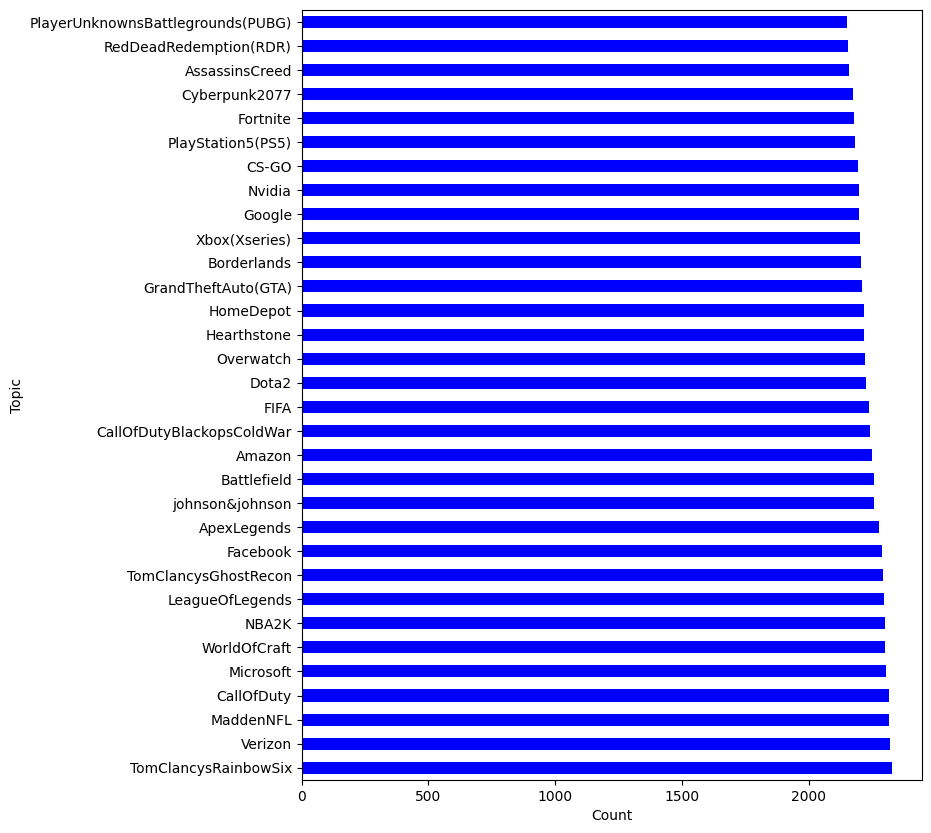

In [82]:
plt.figure(figsize = (8,10))
train['Topic'].value_counts().plot(kind = 'barh' ,color = 'b')
plt.xlabel("Count")
plt.show()

# sentiment Distribution

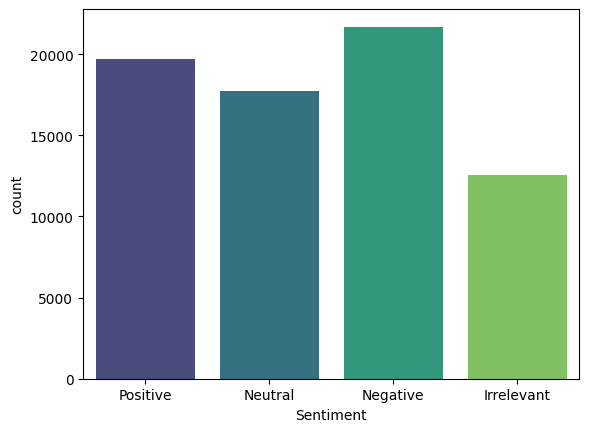

In [83]:
sns.countplot(x = 'Sentiment',data = train , hue = 'Sentiment',palette = 'viridis')
plt.show()

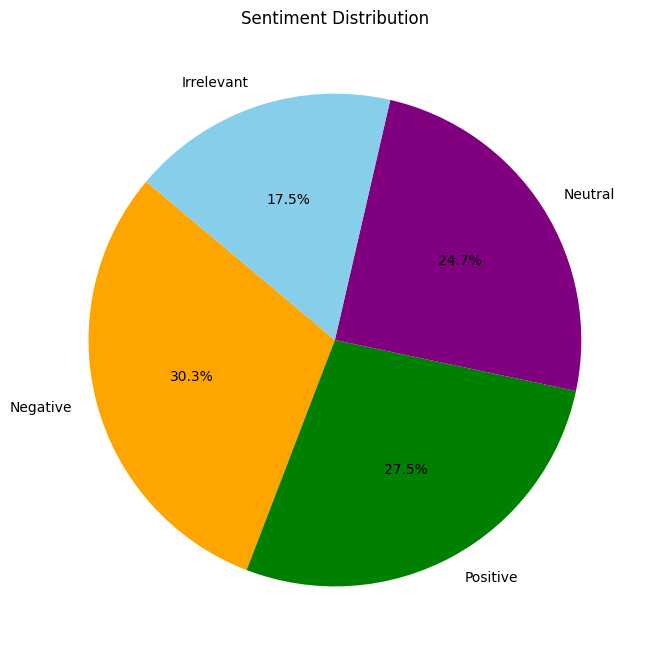

In [84]:
# calculate the count sentiments 
sentiment_counts = train['Sentiment'].value_counts()
# create the pie chart
plt.figure(figsize = (8,8))
plt.pie(sentiment_counts ,labels = sentiment_counts.index,autopct = "%1.1f%%" ,startangle = 140 ,colors = ['orange','green','purple','skyblue','red'])
plt.title("Sentiment Distribution")
plt.show()

In [85]:
train

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


# Sentiment Distribution Topics

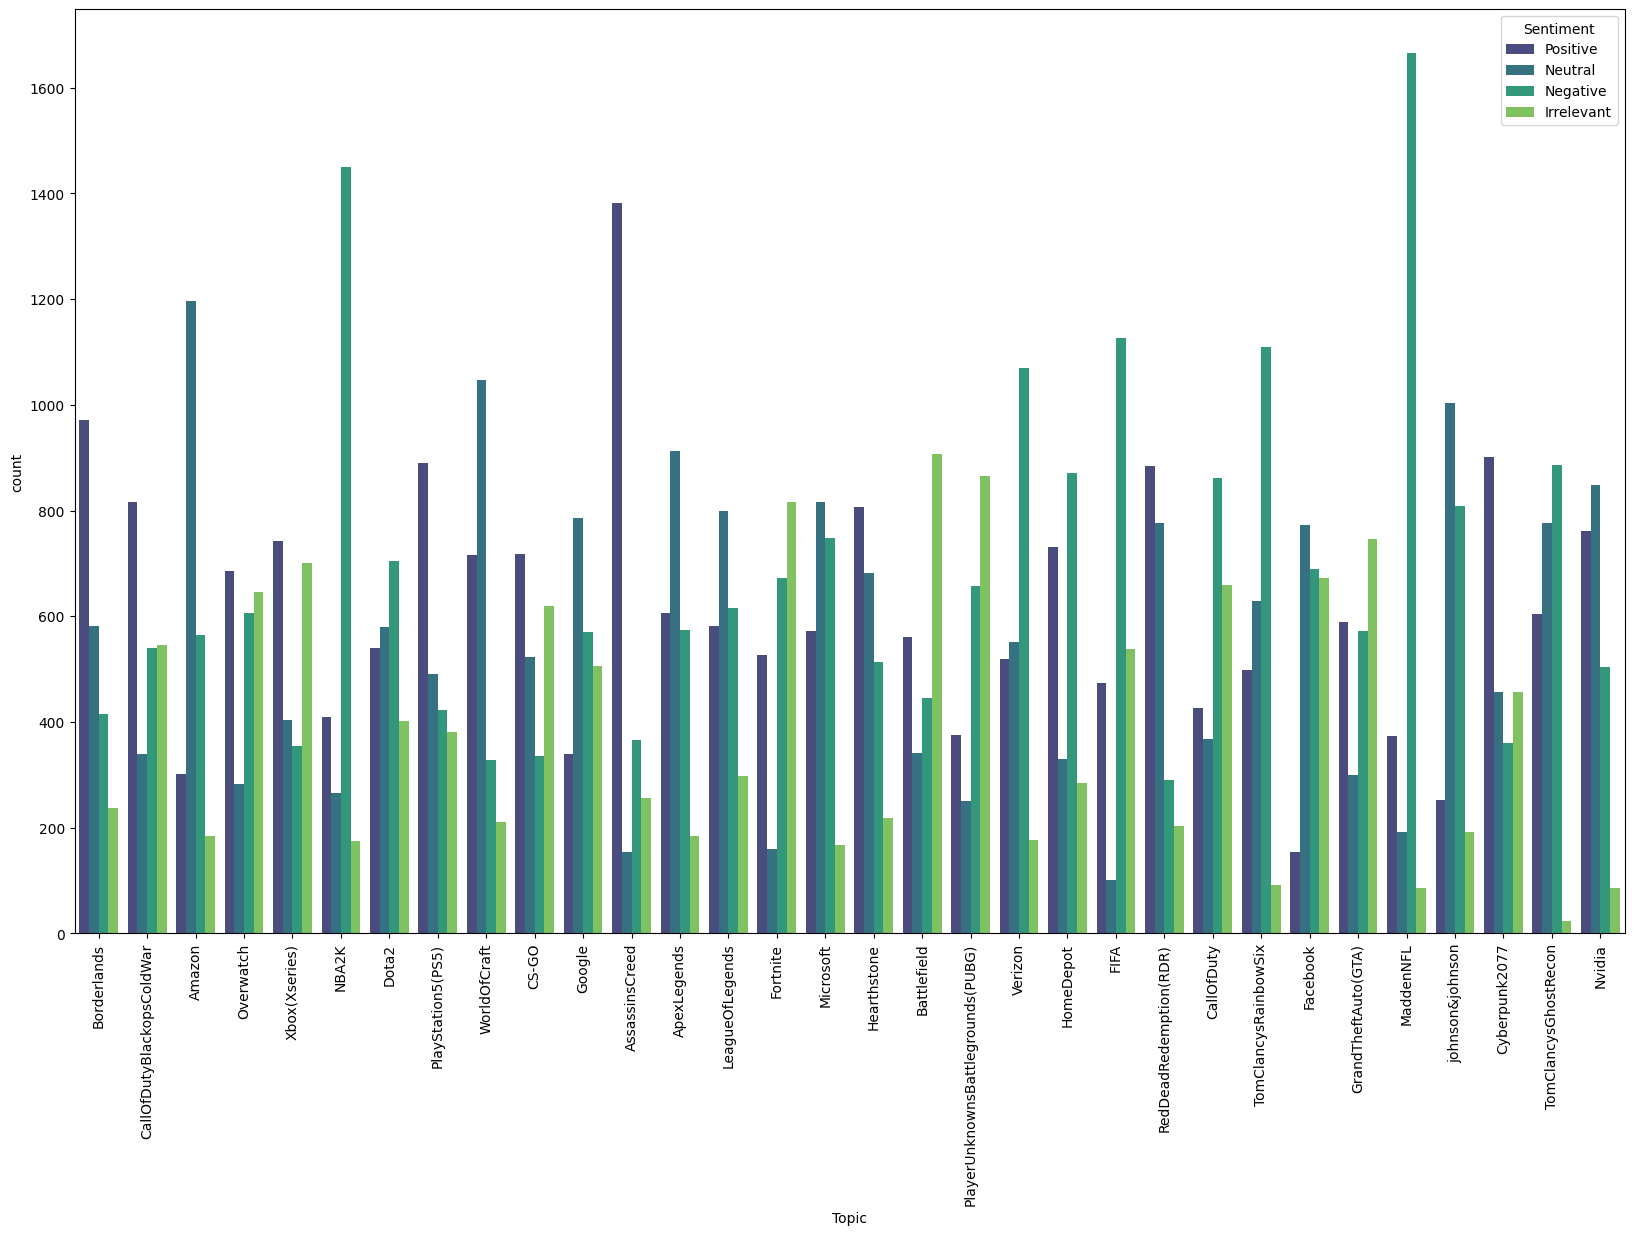

In [86]:
plt.figure(figsize = (20,12))
sns.countplot( x = 'Topic' ,data = train ,palette = 'viridis' ,hue = 'Sentiment')
plt.xticks(rotation = 90)
plt.show()

In [87]:
# group by topic and sentiment 
topic_wise_sentiment = train.groupby(['Topic' ,'Sentiment']).size().reset_index(name = 'Count')
# select top 4 topics
topic_counts = train['Topic'].value_counts().nlargest(4).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment["Topic"].isin(topic_counts)]

# Top 4 topics with negative sentiments

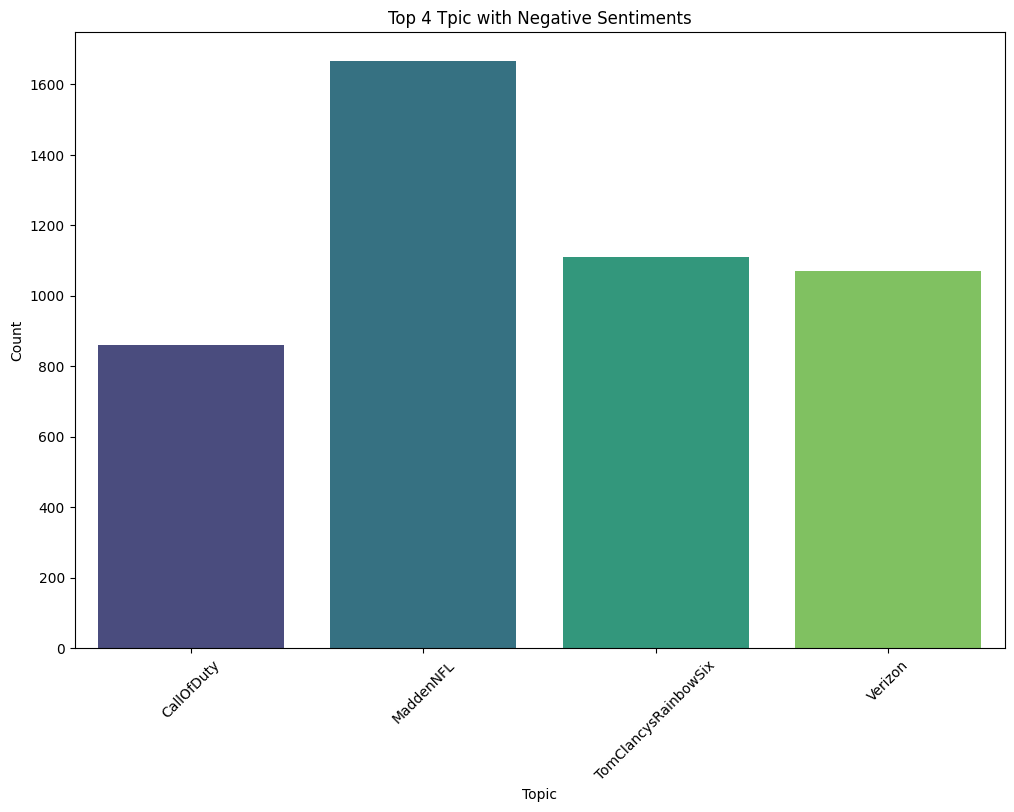

In [88]:
plt.figure(figsize = (12,8))
sns.barplot(data = top_topics_sentiment[top_topics_sentiment["Sentiment"] == 'Negative'] ,x = 'Topic',y = 'Count',hue = 'Topic',palette = 'viridis')
plt.title('Top 4 Tpic with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

# TOP 4 Postive with Sentiments

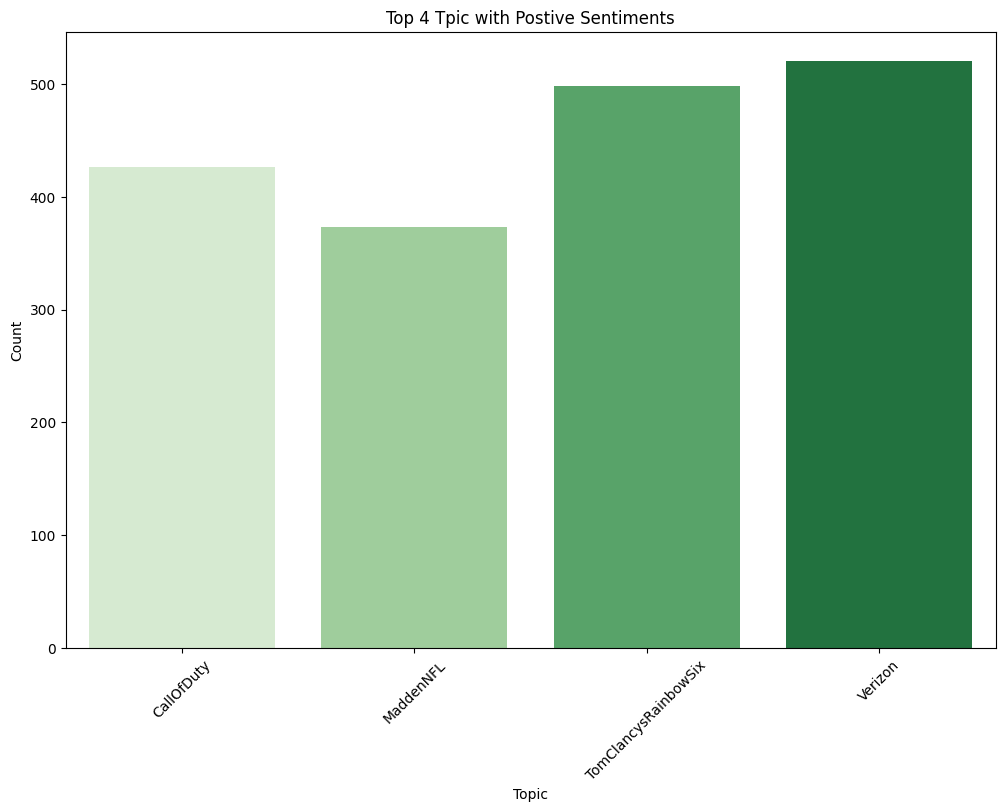

In [89]:
plt.figure(figsize = (12,8))
sns.barplot(data = top_topics_sentiment[top_topics_sentiment["Sentiment"] == 'Positive'] ,x = 'Topic',y = 'Count',hue = 'Topic',palette = 'Greens')
plt.title('Top 4 Tpic with Postive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

# Top 4 Topic with Neutral Sentiments

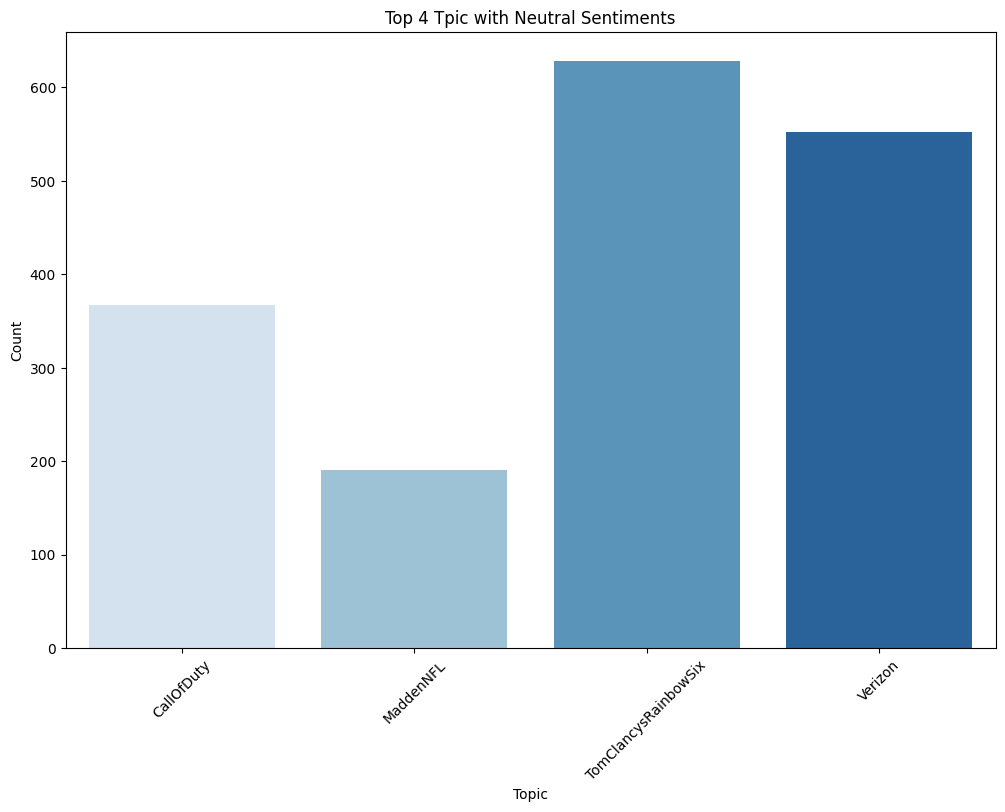

In [90]:
plt.figure(figsize = (12,8))
sns.barplot(data = top_topics_sentiment[top_topics_sentiment["Sentiment"] == 'Neutral'] ,x = 'Topic',y = 'Count',hue = 'Topic',palette = 'Blues')
plt.title('Top 4 Tpic with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

# Top 4 Topics with Irrelevant Sentiment

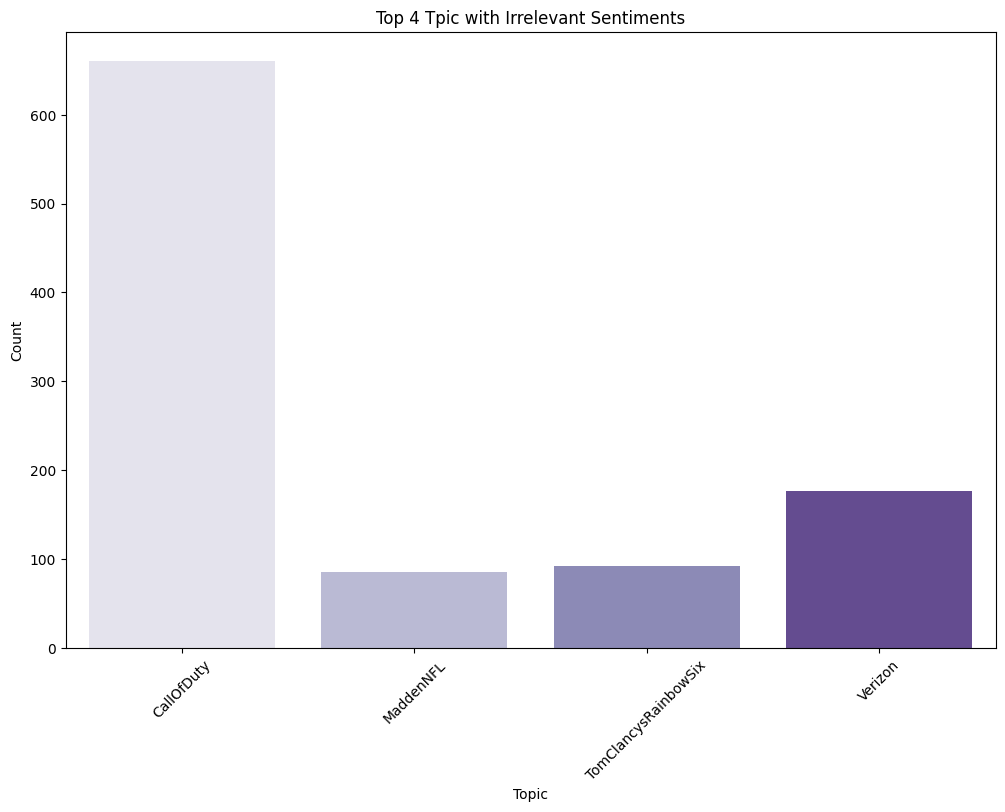

In [91]:
plt.figure(figsize = (12,8))
sns.barplot(data = top_topics_sentiment[top_topics_sentiment["Sentiment"] == 'Irrelevant'] ,x = 'Topic',y = 'Count',hue = 'Topic',palette = 'Purples')
plt.title('Top 4 Tpic with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

# Sentiment Distribution in Google

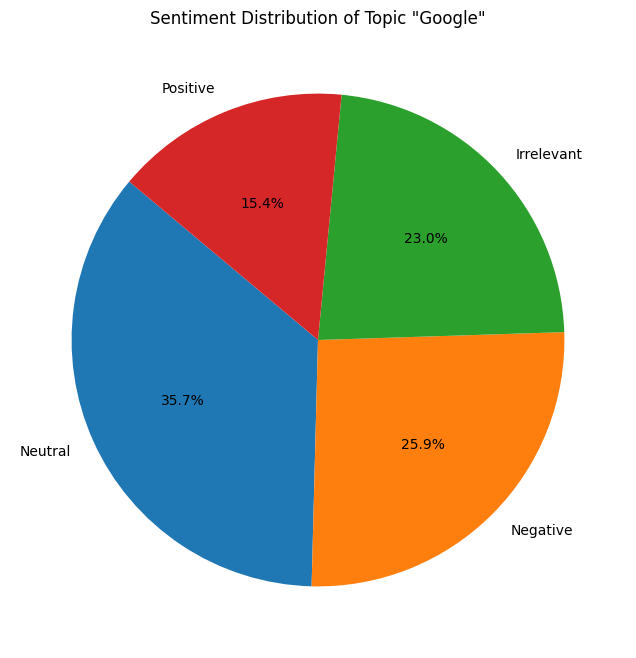

In [92]:
google_data = train[train['Topic'] =='Google']
sentiment_counts = google_data['Sentiment'].value_counts()
# plot the pie chart of google
plt.figure(figsize = (8,8))
plt.pie(sentiment_counts ,labels = sentiment_counts.index , autopct = '%1.1f%%',startangle = 140)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()

# Sentiment Distribution in Microsoft

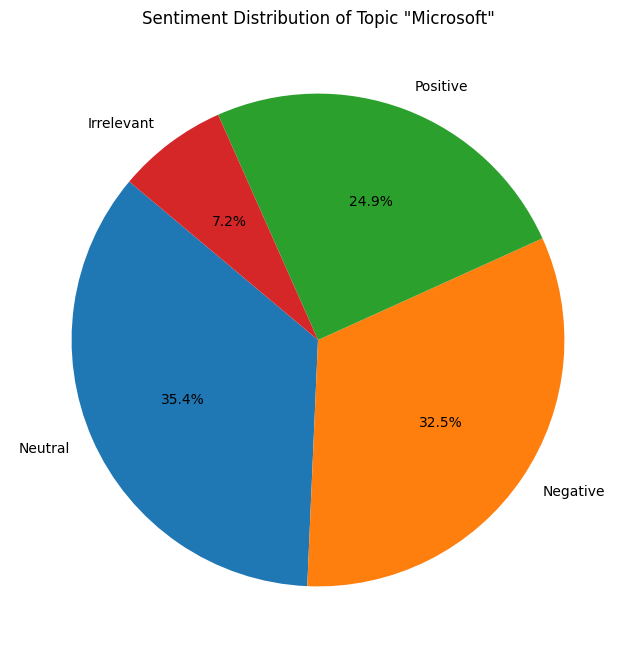

In [93]:
ms_data = train[train['Topic'] =='Microsoft']
sentiment_counts = ms_data['Sentiment'].value_counts()
# plot the pie chart of microsoft
plt.figure(figsize = (8,8))
plt.pie(sentiment_counts ,labels = sentiment_counts.index , autopct = '%1.1f%%',startangle = 140)
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.show()

In [94]:
train['msg_len'] = train['Text'].apply(len)

In [95]:
train

,ID,Topic,Sentiment,Text,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,128
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,117
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,125
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,159


# Plot of message length distribution for training data

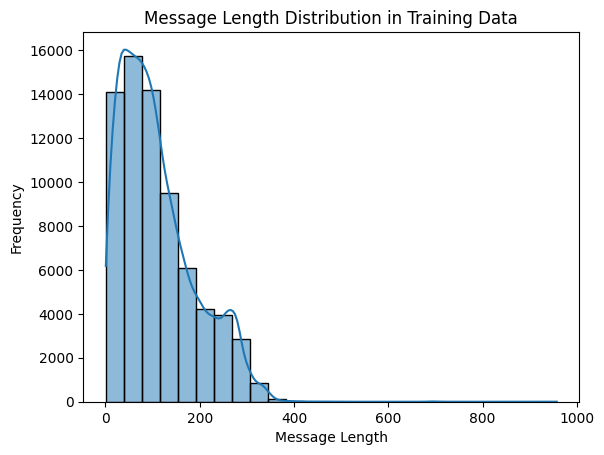

In [96]:
sns.histplot(train['msg_len'] ,bins =25 ,kde = True)
plt.title('Message Length Distribution in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.show()

# Plot mesage length distribution by sentiment for training data

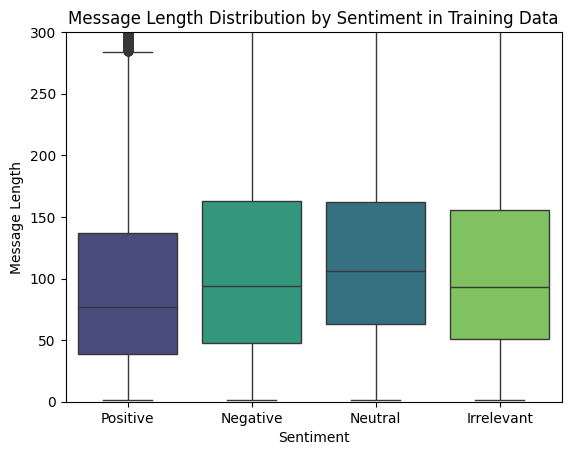

In [97]:
sns.boxplot(data = train ,x = train['Sentiment'] ,hue = 'Sentiment',y = 'msg_len' ,palette = 'viridis' ,order = ['Positive' ,'Negative', 'Neutral','Irrelevant'])
plt.title("Message Length Distribution by Sentiment in Training Data")
plt.ylabel('Message Length')
plt.xlabel('Sentiment')
plt.ylim(0,300)
plt.show()

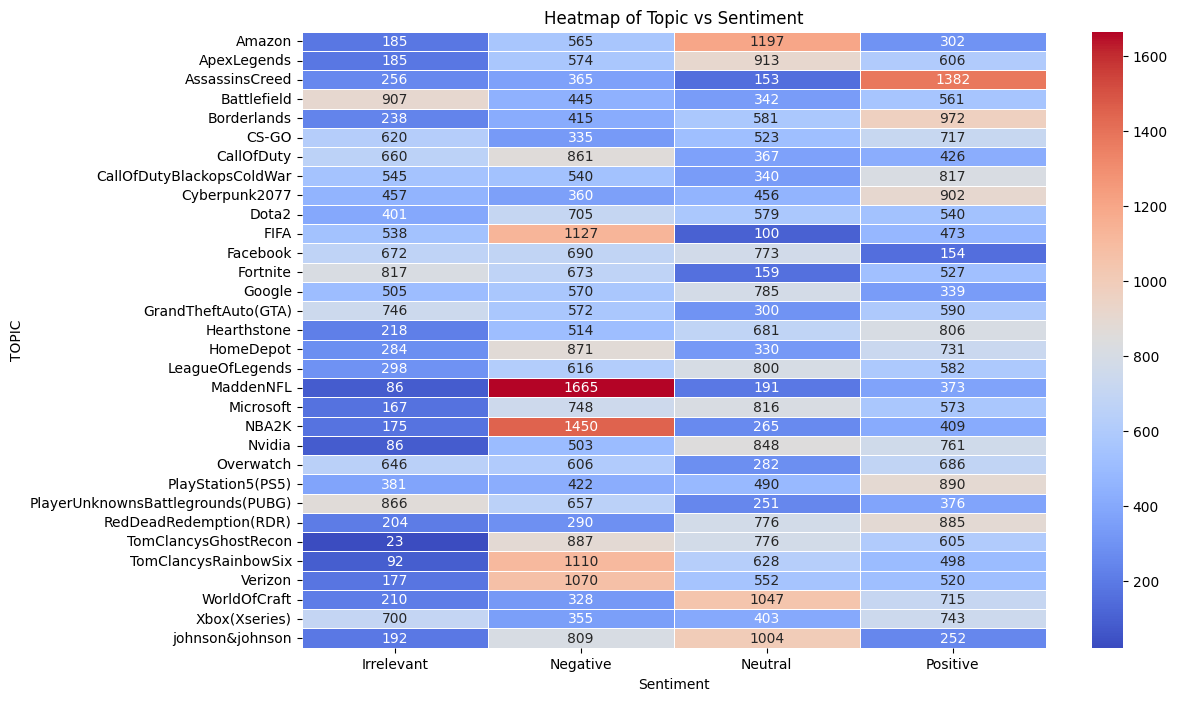

In [98]:
# create crosstab
crosstab = pd.crosstab(index = train['Topic'],columns = train['Sentiment'])
# plot the heatmap
plt.figure(figsize = (12,8))
sns.heatmap(crosstab ,cmap = 'coolwarm' , annot = True ,fmt = 'd' ,linewidths = .5)
# Add labels and title
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('TOPIC')
plt.show()

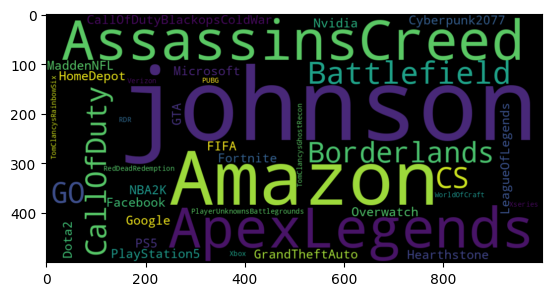

In [99]:
topic_list = ' '.join(crosstab.index)
wc = WordCloud(width = 1000,height =500).generate(topic_list)
plt.imshow(wc , interpolation = 'bilinear')


In [ ]:
corpus = ' '.join(train['Text'])

wc2 = WordCloud(width=1200, height=500).generate(corpus)

plt.imshow(wc2, interpolation='bilinear')